# Generate random numbers for distribution

Exercise 1.35

Generate random numbers according to the function $f(x) = \sqrt{1+\sin x}$ 
in the intervall $0<x<\pi$ using the rejection  methods. 

In [1]:
import sympy as sy
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit
from scipy.integrate import quad

In [2]:
z = sy.symbols('z')
sy.init_printing(use_unicode=True)

# Analytical results

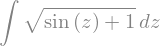

In [3]:
# try symbolic integration
# sympy does not succeed
sy.integrate(sy.sqrt(1+sy.sin(z)), z)

In [4]:
# analytic integral (from Wolfram alpha)
def intfun(x):
    s = np.sin(x/2)
    c = np.cos(x/2)
    return 2*np.sqrt(1+np.sin(x)) * (s-c)/(s+c)

In [5]:
# calculate integral in (0,pi)
intfun(np.pi)-intfun(0)

In [6]:
# Compare with numerical integration
def f1(x, a, b):
    return a*np.sqrt(1+b*np.sin(x))
a = 1
b = 1
xlow = 0
xhigh = np.pi
i = quad(f1, xlow, xhigh, args=(a,b))
i

# Plot Function

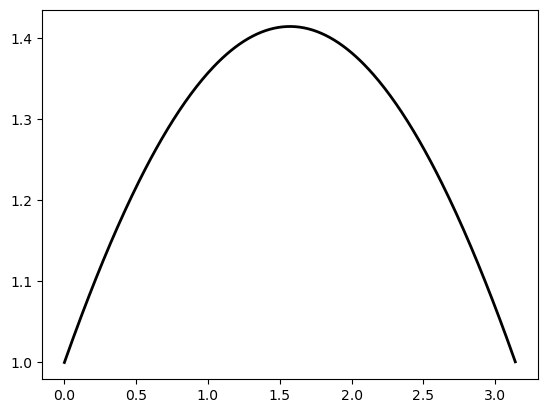

In [7]:
import numpy as np
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(1, 1)
x = np.arange(0, np.pi, 0.01)
plt.plot(x, np.sqrt(1+np.sin(x)),c="k",linewidth=2)
plt.show()

# Generate random numbers

use rejection method

Number of xf, xf/N:  89905 0.89905


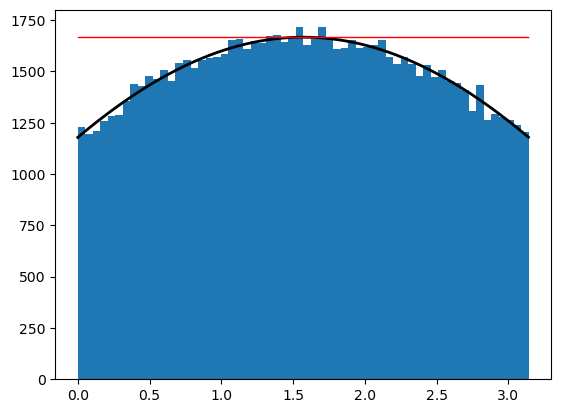

In [8]:
def fun(x):
    return np.sqrt(1+np.sin(x))

N =10**5
nbin = 60
A = N/nbin/np.sqrt(2)
ymax = np.sqrt(2)  #max of function
xa = np.arange(0, np.pi, 0.01)
x  = np.random.rand(N)*np.pi
y  = np.random.rand(N)*ymax
yar = np.ones(len(xa))*ymax*A # np.array of constant line
# apply rejection method
xf = np.where(y <= fun(x),x,np.nan)# set np.nan if y > fun(x)
xf = xf[~np.isnan(xf)] # remove np.nan
print("Number of xf, xf/N: ",len(xf),len(xf)/N)
#ah=plt.hist(xf,300,(0,3))
ah=plt.hist(xf,nbin) # plot hist and return (x,y) values for each bin
plt.plot(xa, A*np.sqrt(1+np.sin(xa)),c="k",linewidth=2)
plt.plot(xa, yar,c="r",linewidth=1)
plt.show()

# Curve-fit

In [9]:
def f2(x, a, b):
    return a * np.sqrt(1+b*np.sin(x))

In [10]:
# extract x-bins from hist, remove last bin (upper limit)
xc = ah[1][:-1] 
yc = ah[0] # extract y-content for each  bin
popt, pcov = curve_fit(f2, xc, yc); popt

array([1.17481512e+03, 1.00947230e+00])

In [11]:
# covariance matrix
pcov

array([[ 1.26449704e+02, -5.03558814e-01],
       [-5.03558814e-01,  2.21217362e-03]])

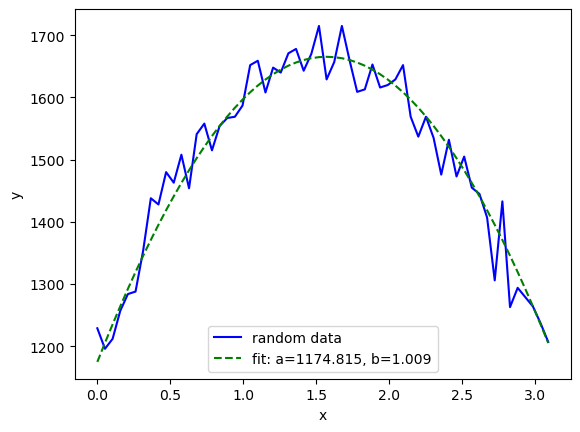

In [12]:
# plot random data and fit
plt.plot(xc, yc, 'b-', label='random data')
plt.plot(xc, f2(xc, *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()